In [2]:
# Importing required libraries
import json
import optuna
import pandas as pd
import functions as fun
import importlib as imp
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{: .3f}".format
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Setting a path to the directory
directory = ''

# Receiving hyperparams for sample modifications
from configparser import ConfigParser
config = ConfigParser()
config.read(directory + 'config.cfg')
lags = json.loads(config.get('params', 'lags'))
log = bool(config.get('params', 'log'))
random_state = int(config.get('params', 'random_state'))

# Creating directories for storage of the results, if they haven't been created already
Path(directory + 'Models/').mkdir(parents = True, exist_ok = True)
Path(directory + 'Predictions/').mkdir(parents = True, exist_ok = True)
Path(directory + 'Alternative_test/').mkdir(parents = True, exist_ok = True)

In [10]:
imp.reload(fun)

<module 'functions' from 'c:\\Users\\user\\OneDrive\\PD\\Диплом М\\real_estate_price_prediction\\functions.py'>

### Training of LightGBM, XGBoost and Catboost. Stacking on the validation and test


 LightGBM, 4 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.0146455	valid_1's rmse: 0.0172566
[200]	training's rmse: 0.0127896	valid_1's rmse: 0.0168852
[300]	training's rmse: 0.0114494	valid_1's rmse: 0.016773
[400]	training's rmse: 0.010351	valid_1's rmse: 0.0167367
[500]	training's rmse: 0.00937768	valid_1's rmse: 0.0166932
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 0.00937768	valid_1's rmse: 0.0166932
Model training 2.056[s]
Train score for lgb is:  2955.19
Validation score for lgb is:  5697.99
Test score for lgb is:  5815.91


PermutationExplainer explainer: 4764it [32:36,  2.43it/s]                          



 XGBoost, 4 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

[0]	train-rmse:9.52143	val-rmse:9.50205
[100]	train-rmse:0.01510	val-rmse:0.01686
[200]	train-rmse:0.01348	val-rmse:0.01651
[300]	train-rmse:0.01225	val-rmse:0.01624
[400]	train-rmse:0.01130	val-rmse:0.01608
[499]	train-rmse:0.01050	val-rmse:0.01601
Model training 12.226[s]
Train score for xgb is:  3312.34
Validation score for xgb is:  5544.04
Test score for xgb is:  5574.21


PermutationExplainer explainer: 4764it [11:16,  6.94it/s]                          



 CatBoost, 4 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

0:	learn: 0.5117875	test: 0.4944506	best: 0.4944506 (0)	total: 5.84ms	remaining: 5.84s
100:	learn: 0.0413335	test: 0.0424591	best: 0.0424591 (100)	total: 518ms	remaining: 4.61s
200:	learn: 0.0320065	test: 0.0338972	best: 0.0338972 (200)	total: 979ms	remaining: 3.89s
300:	learn: 0.0280831	test: 0.0304905	best: 0.0304905 (300)	total: 1.53s	remaining: 3.55s
400:	learn: 0.0243012	test: 0.0270028	best: 0.0270028 (400)	total: 1.98s	remaining: 2.96s
500:	learn: 0.0224880	test: 0.0255833	best: 0.0255833 (500)	total: 2.48s	remaining: 2.47s
600:	learn: 0.0211321	test: 0.0245305	best: 0.0245305 (600)	total: 3s	remaining: 1.99s
700:	learn: 0.0199128	test: 0.0235702	best: 0.0235702 (700)	total: 3.56s	remaining: 1.52s
800:	learn: 0.0191576	test: 0.0232198	best: 0.0231960 (795)	total: 4.01s	remaining: 996ms
900:	learn: 0.0185136	test: 0.0227873	best: 0.0227803 (899)	total: 4.52s	remaining: 496ms
999:	learn: 0.0179373	test: 0.0224001	best: 0.0224001 (999)	total: 4.97s	remaining: 0us

bestTest = 0.0224

PermutationExplainer explainer: 4764it [05:55, 13.02it/s]                          



 Stacking, 4 lag:
                                 OLS Regression Results                                
Dep. Variable:                   orig   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.474e+09
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:51:42   Log-Likelihood:                          13019.
No. Observations:                4763   AIC:                                 -2.603e+04
Df Residuals:                    4761   BIC:                                 -2.602e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.0220318	valid_1's rmse: 0.0273376
[200]	training's rmse: 0.0185066	valid_1's rmse: 0.0263913
[300]	training's rmse: 0.0160139	valid_1's rmse: 0.0259781
[400]	training's rmse: 0.0140509	valid_1's rmse: 0.0259319
[500]	training's rmse: 0.0125503	valid_1's rmse: 0.0258542
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 0.0125503	valid_1's rmse: 0.0258542
Model training 2.173[s]
Train score for lgb is:  3811.52
Validation score for lgb is:  8416.8
Test score for lgb is:  8479.79


PermutationExplainer explainer: 4764it [33:56,  2.33it/s]                          



 XGBoost, 13 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

[0]	train-rmse:9.53059	val-rmse:9.51256
[100]	train-rmse:0.01999	val-rmse:0.02623
[200]	train-rmse:0.01564	val-rmse:0.02524
[300]	train-rmse:0.01245	val-rmse:0.02480
[400]	train-rmse:0.01024	val-rmse:0.02449
[499]	train-rmse:0.00855	val-rmse:0.02433
Model training 17.630[s]
Train score for xgb is:  2559.07
Validation score for xgb is:  7803.82
Test score for xgb is:  7801.32


PermutationExplainer explainer: 4764it [15:15,  5.15it/s]                          



 CatBoost, 13 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

0:	learn: 0.5122676	test: 0.4953408	best: 0.4953408 (0)	total: 5.28ms	remaining: 5.27s
100:	learn: 0.0502483	test: 0.0510503	best: 0.0510503 (100)	total: 462ms	remaining: 4.11s
200:	learn: 0.0386053	test: 0.0405312	best: 0.0405312 (200)	total: 1.03s	remaining: 4.1s
300:	learn: 0.0348667	test: 0.0376107	best: 0.0376107 (300)	total: 1.51s	remaining: 3.51s
400:	learn: 0.0321036	test: 0.0354266	best: 0.0354266 (400)	total: 1.98s	remaining: 2.95s
500:	learn: 0.0305676	test: 0.0344361	best: 0.0344361 (500)	total: 2.44s	remaining: 2.43s
600:	learn: 0.0285849	test: 0.0328458	best: 0.0328334 (591)	total: 2.92s	remaining: 1.94s
700:	learn: 0.0274720	test: 0.0322021	best: 0.0322021 (700)	total: 3.37s	remaining: 1.44s
800:	learn: 0.0263247	test: 0.0314547	best: 0.0314547 (800)	total: 3.86s	remaining: 959ms
900:	learn: 0.0254507	test: 0.0309394	best: 0.0309394 (900)	total: 4.29s	remaining: 472ms
999:	learn: 0.0246429	test: 0.0304752	best: 0.0304752 (999)	total: 4.78s	remaining: 0us

bestTest = 0.03

PermutationExplainer explainer: 4764it [05:47, 13.35it/s]                          



 Stacking, 13 lag:
                                 OLS Regression Results                                
Dep. Variable:                   orig   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.364e+08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:05:05   Log-Likelihood:                          11014.
No. Observations:                4763   AIC:                                 -2.202e+04
Df Residuals:                    4761   BIC:                                 -2.201e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.0262088	valid_1's rmse: 0.0345046
[200]	training's rmse: 0.0210228	valid_1's rmse: 0.0333124
[300]	training's rmse: 0.0178033	valid_1's rmse: 0.0326778
[400]	training's rmse: 0.0156715	valid_1's rmse: 0.0324154
[500]	training's rmse: 0.0141147	valid_1's rmse: 0.0323236
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 0.0141147	valid_1's rmse: 0.0323236
Model training 3.792[s]
Train score for lgb is:  4527.01
Validation score for lgb is:  10771.68
Test score for lgb is:  10495.9


PermutationExplainer explainer: 4628it [41:58,  1.83it/s]                          



 XGBoost, 26 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

[0]	train-rmse:9.53370	val-rmse:9.53298
[100]	train-rmse:0.03043	val-rmse:0.03591
[200]	train-rmse:0.02490	val-rmse:0.03421
[300]	train-rmse:0.02137	val-rmse:0.03355
[400]	train-rmse:0.01853	val-rmse:0.03304
[499]	train-rmse:0.01631	val-rmse:0.03268
Model training 13.371[s]
Train score for xgb is:  4837.88
Validation score for xgb is:  10271.29
Test score for xgb is:  10720.08


PermutationExplainer explainer: 4628it [12:44,  5.97it/s]                          



 CatBoost, 26 lag:


  0%|          | 0/50 [00:00<?, ?it/s]

0:	learn: 0.5133508	test: 0.5038064	best: 0.5038064 (0)	total: 5ms	remaining: 4.99s
100:	learn: 0.0537654	test: 0.0559457	best: 0.0559457 (100)	total: 483ms	remaining: 4.3s
200:	learn: 0.0442018	test: 0.0469129	best: 0.0469018 (198)	total: 950ms	remaining: 3.77s
300:	learn: 0.0407855	test: 0.0442927	best: 0.0442927 (300)	total: 1.37s	remaining: 3.19s
400:	learn: 0.0383668	test: 0.0427178	best: 0.0427178 (400)	total: 1.85s	remaining: 2.77s
500:	learn: 0.0363670	test: 0.0414628	best: 0.0414628 (500)	total: 2.28s	remaining: 2.27s
600:	learn: 0.0349519	test: 0.0405974	best: 0.0405974 (600)	total: 2.76s	remaining: 1.83s
700:	learn: 0.0336628	test: 0.0399686	best: 0.0399686 (700)	total: 3.21s	remaining: 1.37s
800:	learn: 0.0323745	test: 0.0392613	best: 0.0392613 (800)	total: 3.67s	remaining: 913ms
900:	learn: 0.0315645	test: 0.0389537	best: 0.0389423 (897)	total: 4.1s	remaining: 450ms
999:	learn: 0.0306673	test: 0.0385412	best: 0.0385412 (999)	total: 4.55s	remaining: 0us

bestTest = 0.038541

PermutationExplainer explainer: 4628it [05:26, 13.75it/s]                          



 Stacking, 26 lag:
                                 OLS Regression Results                                
Dep. Variable:                   orig   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.652e+08
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:22:26   Log-Likelihood:                          9471.7
No. Observations:                4627   AIC:                                 -1.894e+04
Df Residuals:                    4625   BIC:                                 -1.893e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

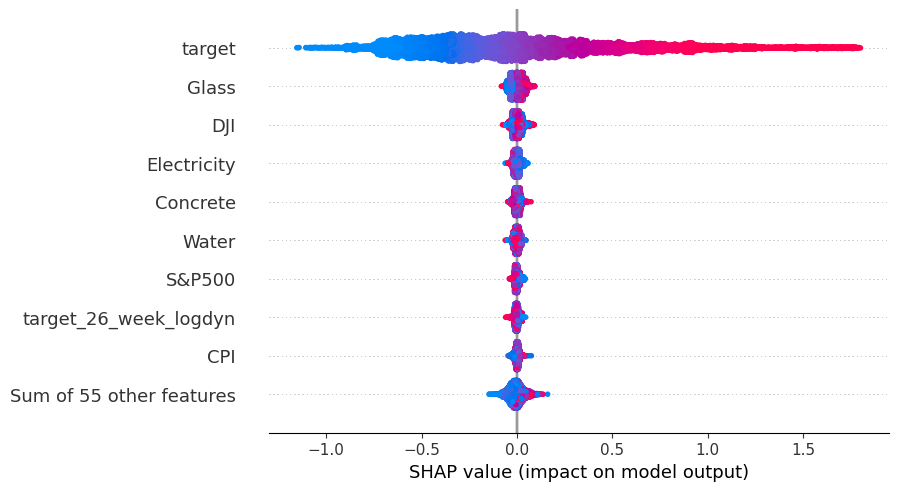

In [3]:
# Iterate over lags to split data, create models and calculate stacking
for lag in lags:
    Path(directory + f'Models/{lag}/').mkdir(parents = True, exist_ok = True)
    Path(directory + f'Predictions/{lag}/').mkdir(parents = True, exist_ok = True)
    fun.optuna_and_boosting(lag, random_state, directory = directory)

### Estimation of the model on the Case-Shiller index

In [11]:
# Iterate over lags to calculate separate stacking models with smoothening
periods = [[pd.to_datetime('2003-01-01'), pd.to_datetime('2025-01-01')],
           [pd.to_datetime('2003-01-01'), pd.to_datetime('2010-01-01')],
           [pd.to_datetime('2010-01-01'), pd.to_datetime('2018-01-01')],
           [pd.to_datetime('2018-01-01'), pd.to_datetime('2025-01-01')]]
for lag in lags:
    Path(directory + f'Alternative_test/{lag}/').mkdir(parents = True, exist_ok = True)
    fun.check_2008(lag, periods = periods, directory = directory)


 2008 stacking, 4 lag:

 Start date : 2003-01-01, end date: 2025-01-01
Final RMSE for Case-Shiller: 2242.05
Final RMSE for Case-Shiller with smoothed predictions is: 2009.94

 Start date : 2003-01-01, end date: 2010-01-01
Final RMSE for Case-Shiller: 2975.273
Final RMSE for Case-Shiller with smoothed predictions is: 2856.586

 Start date : 2010-01-01, end date: 2018-01-01
Final RMSE for Case-Shiller: 1375.758
Final RMSE for Case-Shiller with smoothed predictions is: 1110.665

 Start date : 2018-01-01, end date: 2025-01-01
Final RMSE for Case-Shiller: 2378.139
Final RMSE for Case-Shiller with smoothed predictions is: 1981.697

 2008 stacking, 13 lag:

 Start date : 2003-01-01, end date: 2025-01-01
Final RMSE for Case-Shiller: 7182.02
Final RMSE for Case-Shiller with smoothed predictions is: 6044.992

 Start date : 2003-01-01, end date: 2010-01-01
Final RMSE for Case-Shiller: 10380.332
Final RMSE for Case-Shiller with smoothed predictions is: 9974.363

 Start date : 2010-01-01, end date

### Distribution of target and prediction on the validation and test

In [61]:
# Iterate over lags to calculate distributions of target and predictions
for lag in lags:
    fun.target_pred_dist(lag, directory = directory)

### Get hyperparameters of the LightGBM, XGBoost and CatBoost

In [8]:
# Iterate over lags to get boosting hyperparameters
for lag in lags:
    fun.boosting_hyperparameters(lag, directory = directory)


 LightGBM, 4 lag:
{'boosting': 'gbdt', 'objective': 'regression', 'metric': ['rmse'], 'tree_learner': 'serial', 'device_type': 'cpu', 'num_iterations': 500, 'learning_rate': 0.25, 'num_leaves': 44, 'num_threads': 0, 'deterministic': False, 'force_col_wise': False, 'force_row_wise': False, 'histogram_pool_size': -1, 'max_depth': 6, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.001, 'bagging_fraction': 0.933217, 'pos_bagging_fraction': 1, 'neg_bagging_fraction': 1, 'bagging_freq': 6, 'bagging_seed': 4542, 'feature_fraction': 0.93094, 'feature_fraction_bynode': 1, 'feature_fraction_seed': 13336, 'extra_trees': False, 'extra_seed': 29642, 'early_stopping_round': 100, 'first_metric_only': False, 'max_delta_step': 0, 'lambda_l1': 2.00532e-07, 'lambda_l2': 0.000408206, 'linear_lambda': 0, 'min_gain_to_split': 0, 'drop_rate': 0.1, 'max_drop': 50, 'skip_drop': 0.5, 'xgboost_dart_mode': False, 'uniform_drop': False, 'drop_seed': 2449, 'top_rate': 0.2, 'other_rate': 0.1, 'min_data_per_gro

### Training of the OLS benchmark

In [62]:
# Iterate over lags to calculate OLS benchmarks
for lag in lags:
    fun.OLS_benchmark(lag, directory = directory)


 OLS benchmark, 4 lag:
                            OLS Regression Results                            
Dep. Variable:      target_4_week_fut   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.717e+05
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:12:25   Log-Likelihood:                 84849.
No. Observations:               32591   AIC:                        -1.696e+05
Df Residuals:                   32548   BIC:                        -1.693e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------